# MAT 594E : FINAL PROJECT 
## Ambika Yadav 
### Data Analysis and Visualization of World Populations


In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
populations_raw = pd.read_csv("Population-Data_UN.csv")

In [37]:
populations_raw.head()

,Country or Area,Year(s),Variant,Value
0,Afghanistan,2100,Const. mortality (Medium),40190.280
1,Afghanistan,2100,Constant-fertility scenario,845843.367
2,Afghanistan,2100,High variant,92331.174
3,Afghanistan,2100,Instant replacement,52174.837
4,Afghanistan,2100,Low variant,35950.480


In [38]:
populations_final = populations_raw.loc[(populations_raw['Year(s)'] <2016) & (populations_raw['Variant'] == 'Medium variant') , ['Country or Area','Year(s)','Value']]
populations_final.head()

,Country or Area,Year(s),Value
141,Afghanistan,2015,32006.788
149,Afghanistan,2010,28397.812
152,Afghanistan,2005,24860.855
153,Afghanistan,2000,20595.360
154,Afghanistan,1995,17586.073


In [39]:
Countries = populations_final['Country or Area'].unique()
Years = populations_final['Year(s)'].unique()
Years.sort()

In [40]:
final_sorted_countries = pd.DataFrame(columns=['Countries'])
for year_count in Years:
    final_sorted_countries[year_count] = 0

for i in range(0,len(Countries)) :
    c_1= populations_final.ix[populations_final['Country or Area'] == Countries[i]]
    year_array= [];
    year_array.append(Countries[i]);
    for y_count in range(0,len(Years)):
        temp_count = populations_final.ix[populations_final['Country or Area'] == Countries[i]]
        temp_year = temp_count.ix[temp_count['Year(s)'] == Years[y_count],'Value']
        year_array.append(temp_year.values[0])
    final_sorted_countries.loc[i]=year_array


In [41]:
final_sorted_countries

,Countries,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015
0,Afghanistan,7450.738,8009.614,8774.440,9765.015,11015.621,12551.790,13180.431,11528.977,11731.193,17586.073,20595.360,24860.855,28397.812,32006.788
1,Africa,228826.701,253987.898,285270.283,322581.411,366474.876,417412.997,478459.469,549845.785,629986.978,716505.130,808304.337,911527.669,1031083.666,1166239.306
2,Albania,1214.489,1390.137,1618.829,1874.302,2138.966,2426.592,2734.776,3077.930,3446.882,3357.858,3304.948,3196.130,3150.143,3196.981
3,Algeria,8872.247,9917.048,11277.757,12771.084,14690.855,16833.516,19475.204,22847.437,26239.708,29315.463,31719.449,33960.903,37062.820,40633.464
4,American Samoa,18.937,19.706,20.012,23.518,27.292,29.932,32.456,39.247,47.044,52.874,57.522,59.117,55.636,55.538
5,Andorra,6.197,9.235,13.414,18.551,24.279,30.706,36.063,44.597,54.511,63.854,65.399,81.223,77.907,80.950
6,Angola,4147.509,4543.150,4965.988,5433.841,5928.087,6637.628,7637.141,9063.646,10333.844,12104.952,13924.930,16544.376,19549.124,22819.926
7,Anguilla,5.121,5.697,5.863,6.114,6.400,6.630,6.698,6.662,8.334,9.807,11.071,12.637,13.768,14.614
8,Antigua and Barbuda,46.301,52.611,54.681,59.653,65.369,69.253,70.301,65.744,61.906,68.349,77.648,82.565,87.233,91.822
9,Areas not elsewhere specified,946.597,1009.626,1102.550,1242.540,1201.816,1397.337,1661.419,1942.390,2298.945,2852.476,3510.974,3988.436,4528.327,5153.913


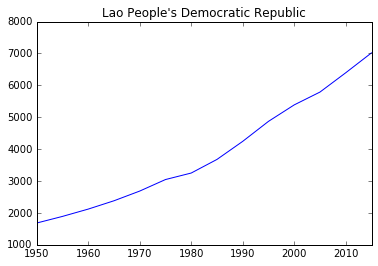

In [42]:
which_country = 123
final_sorted_countries.iloc[which_country,1:len(final_sorted_countries.columns)].T.plot()
plt.title(final_sorted_countries.iloc[which_country,0])

In [43]:
# Combining this data with surface area data 
surfacearea_raw = pd.read_csv("Surface_Area_Data.csv");
surfacearea_raw.head()

,Countries,Value,Parent
0,Afghanistan,652860,World
1,Albania,28750,World
2,Algeria,2381740,World
3,American Samoa,200,World
4,Andorra,470,World


In [44]:
final = pd.merge(surfacearea_raw, final_sorted_countries, how='inner', on=['Countries']);
final.head()

,Countries,Value,Parent,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015
0,Afghanistan,652860,World,7450.738,8009.614,8774.440,9765.015,11015.621,12551.790,13180.431,11528.977,11731.193,17586.073,20595.360,24860.855,28397.812,32006.788
1,Albania,28750,World,1214.489,1390.137,1618.829,1874.302,2138.966,2426.592,2734.776,3077.930,3446.882,3357.858,3304.948,3196.130,3150.143,3196.981
2,Algeria,2381740,World,8872.247,9917.048,11277.757,12771.084,14690.855,16833.516,19475.204,22847.437,26239.708,29315.463,31719.449,33960.903,37062.820,40633.464
3,American Samoa,200,World,18.937,19.706,20.012,23.518,27.292,29.932,32.456,39.247,47.044,52.874,57.522,59.117,55.636,55.538
4,Andorra,470,World,6.197,9.235,13.414,18.551,24.279,30.706,36.063,44.597,54.511,63.854,65.399,81.223,77.907,80.950


In [45]:
final.to_csv("Final_Data.csv", sep='\t')